# NLP With Hotel Review Part 1  
  
Daniel Mortensen  
30-Aug-2021  

## Introduction

Reviewer raitings, along with significant other metadata, has been collected for a number of hotels. This data needs to be cleaned and prepped for sentiment analysis. The final product of this report will be a cleaned data frame ready for use for sentiment analysis. 

*Task Summary*  
1. Perform basic exploratory data analysis on the review data, including:
    - determining the shape of the collected data
    - converting all reviews to integer values
    - examining the distribution of reviewer scores
    - seperating the data and metadata into numeric and categorical data frames
    - developing a plan for converting categorical data into numeric data
2. Convert the review scores to binary values, with a 1 for 'good' and a 0 for 'bad'. 
3. Convert the categorical data to numeric data
4. Split the data into train and test sets
5. Convert the `Positive_Review` and `Negative_Review` data into sparse word count matrices.

*Results Summary*  
The hotel reviews data frame has 515738 rows (entries) and 17 columns (details). The data has a roughly normal distribution centered around 10, with a possible second normal distribution centered around 8. All of the categorical data has been either transformed into numerical data or dropped from the analysis. Training and test data sets have been generated, and the positive and negative reviews from these data sets have been vectorized into sparce matrices. The resulting data has been exported as csv files and is ready for sentiment analysis. 

## Methods

Data were taken from the provided Hotel_Reviews.csv file. All data were analyzed in this Jupyter Notebook, which is running on a Python 3 kernel. 

The following libraries were imported for analysis and visualiztion:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

The Hotel_Reviews.csv file was imported as "hot_rev_df".

In [2]:
# import the data from the csv file
hot_rev_df = pd.read_csv('./Hotel_Reviews.csv')

# confirm the data imported properly
hot_rev_df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


## Exploratory Data Analysis

#### *Data Frame Shape* 

In [3]:
# The shape of the imported data is determined
hot_rev_df.shape

(515738, 17)

The hotel reviews data frame has 515738 rows (entries) and 17 columns (details).

#### *Converting Reviews to Integer Values*

The `Reviewer_Score` column is rounded using a built in NumPy function (`round`).

In [4]:
hot_rev_df['Reviewer_Score'] = hot_rev_df['Reviewer_Score'].apply(np.round)

The rounded reviewer scores are then formaly converted to integer values using the `astype` function.

In [5]:
hot_rev_df['Reviewer_Score'] = hot_rev_df['Reviewer_Score'].astype('int')

The `head` function is used to visualize the first three rows of the data to ensure that the review scores were transformed correctly.

In [6]:
hot_rev_df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


#### *Review Score Distributions*

Review score distributions depend on customer satisfaction with the hotel. When the customer experience is not well controlled (different customers receive different levels of service) reviews are likely to have broad distributions. When customer experience is well controlled, the reviews are more likely to have narrow distributions. The centroid of these distributions is correlated with the overall quality of the experience and whether it meets, exceeds, or is below expectations. In poorly controlled situation it is somewhat likely to have a bimodal distribution in the reviews as a result of customers being either happy or unhappy overall.  
  
The review scores will be plotted here as a histogram to view the distribution of scores.

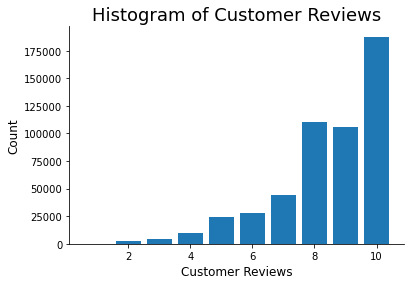

In [7]:
# The variable "bins" is a list of bins with widths running from half below 
# to half above the values of interest (1,2,3...10). This is done so that the plotted 
# data is centered on the value of interest.
bins = np.arange(0.5,11.5,1)

plt.figure()
plt.hist(hot_rev_df['Reviewer_Score'], bins=bins, rwidth = 0.8)
plt.xlabel('Customer Reviews', size=12)
plt.ylabel('Count', size=12)
plt.title('Histogram of Customer Reviews', size=18)

sns.despine()
plt.show()

The data has a roughly normal distribution centered around 10. There may be a second normal distribution centered around 8. There is no clear distinction between a '`positive`' and '`negative`' review. Therefore, a judgement call will have to be made about where to draw the cutoff. Since there is a slight uptick at a score of 8, the data will be divided as follows:  
- A score between 0-8 will be classified as 'negative'
- A score of 9 or 10 will be classified as 'positive'

#### *Check for Missing Values*

Missing values may negatively impact the desired sentiment analysis. Therfore, the data frame will be checked for missing values.

In [8]:
hot_rev_df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

Both `lat` and `lng` are missing the same amount of data, so it is likely that they are missing data from the same rows. I will now see which hotels (by `Hotel_Name` and `Hotel_Address`) are missing information.

In [9]:
hot_rev_df[hot_rev_df['lat'].isna()][['Hotel_Name', 'Hotel_Address']].value_counts()

Hotel_Name                                        Hotel_Address                                              
Fleming s Selection Hotel Wien City               Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    658
Hotel City Central                                Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            563
Hotel Atlanta                                     W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       389
Maison Albar Hotel Paris Op ra Diamond            4 rue de la P pini re 8th arr 75008 Paris France               290
Hotel Daniel Vienna                               Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         245
Hotel Pension Baron am Schottentor                W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          223
Austria Trend Hotel Schloss Wilhelminenberg Wien  Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               194
Derag Livinghotel Kaiser Franz Joseph Vienna      Sieveringer Stra e 4 

This is not a lot of hotels, so I can look up their longitude and latitude manually and then map them into the data frame.

In [10]:
# Hotel latitudes
lat_map = {
    'Fleming s Selection Hotel Wien City': 48.20947746,
    'Hotel City Central': 48.21373145,
    'Hotel Atlanta': 48.22620225,
    'Maison Albar Hotel Paris Op ra Diamond': 48.87309424,
    'Hotel Daniel Vienna': 48.1890197,
    'Hotel Pension Baron am Schottentor': 48.21697792,
    'Austria Trend Hotel Schloss Wilhelminenberg Wien': 48.21969803,
    'Derag Livinghotel Kaiser Franz Joseph Vienna': 48.25307437,
    'NH Collection Barcelona Podium': 41.39158254,
    'City Hotel Deutschmeister': 48.22100207,
    'Hotel Park Villa': 48.23372772,
    'Cordial Theaterhotel Wien': 48.20972045,
    'Holiday Inn Paris Montmartre': 48.88907565,
    'Roomz Vienna': 48.18763827,
    'Mercure Paris Gare Montparnasse': 48.84012275,
    'Renaissance Barcelona Hotel': 41.39296928,
    'Hotel Advance': 41.38331216
}

# Hotel longitudes
lon_map = {
    'Fleming s Selection Hotel Wien City': 16.3533741,
    'Hotel City Central': 16.37991733,
    'Hotel Atlanta': 16.35690842,
    'Maison Albar Hotel Paris Op ra Diamond': 2.297831148,
    'Hotel Daniel Vienna': 16.38422243,
    'Hotel Pension Baron am Schottentor': 16.36021328,
    'Austria Trend Hotel Schloss Wilhelminenberg Wien': 16.28575304,
    'Derag Livinghotel Kaiser Franz Joseph Vienna': 16.34177939,
    'NH Collection Barcelona Podium': 2.178306865,
    'City Hotel Deutschmeister': 16.36701997,
    'Hotel Park Villa': 16.3463377,
    'Cordial Theaterhotel Wien': 16.35145258,
    'Holiday Inn Paris Montmartre': 2.333431331,
    'Roomz Vienna': 16.42318843,
    'Mercure Paris Gare Montparnasse': 2.324248455,
    'Renaissance Barcelona Hotel': 2.167420863,
    'Hotel Advance': 2.163537691
}


In [11]:
# Replace missing longitude values
for key, value in lon_map.items():
    hot_rev_df.loc[hot_rev_df['Hotel_Name'] == key, 'lng'] = value

# confirm there are no longer any missing longitudes
display(hot_rev_df.isna().sum())

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                              0
dtype: int64

In [12]:
# Replace missing latitude values
for key, value in lat_map.items():
    hot_rev_df.loc[hot_rev_df['Hotel_Name'] == key, 'lat'] = value

# confirm there are no longer any missing latitudes
display(hot_rev_df.isna().sum())

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

All missing values have now been filled in with the appropriate data. No data needed to be modelled, interpelated, or suplimented.

#### *Numeric and Categorical Classifications*

The data types of the different columns is checked. Numeric data types, such as `int64` or `float64` will be classified as numeric. All other data types, especially the `object` data type will be classified as categorical.

In [13]:
hot_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Numeric Columns:  
- `Additional_Number_of_Scoring`
- `Average_Score`
- `Review_Total_Negative_Word_Counts`
- `Total_Number_of_Reviews`
- `Review_Total_Positive_Word_Counts`
- `Total_Number_of_Reviews_Reviewer_Has_Given`
- `Reviewer_Score`
- `lat`
- `lng`

Non-numeric Columns (and --> conversion plan):
- `Hotel_Address` --> Could be converted to numeric, but information is redundant of `lat` and `lng` columns. **drop**
- `Review_Date` --> `Year`, `Month`, `Week`, and `Day_of_Week` are all of interest. These will be mapped onto a circle to capture the cyclic nature of the data.
- `Hotel_Name` --> Cannot be converted to numeric value. (Note: a unique number could be assigned to each hotel, but this would likely not give any useful results. The hotel's location is already given in the `lat` and `lng` columns.) **drop**
- `Reviewer_Nationality` --> Could be converted to a binary value corresponding to something like `native` vs `foreigner` or `European` vs `Non-European`. Will be dropped here for simplicity. **drop**
- `Negative_Review` --> Will be turned into a word count vector, weighted for word significance.
- `Positive_Review` --> Will be turned into a word count vector, weighted for word significance.
- `Tags` --> Could potentially be converted to dummy variables. Further EDA is required.
- `days_since_review` --> Can be converted to a number by dropping ' days' from the entries. 

I will now split the data into numeric and categorical dataframes.

In [14]:
# Seperating the data into numeric and categorical dataframes and then confirming they both look correct.

hot_numeric = hot_rev_df.select_dtypes(include=['int64', 'int32', 'float64'])
display(hot_numeric.head(3))

hot_cat = hot_rev_df.select_dtypes('object')
display(hot_cat.head(3))

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
0,194,7.7,397,1403,11,7,3,52.360576,4.915968
1,194,7.7,0,1403,105,7,8,52.360576,4.915968
2,194,7.7,42,1403,21,9,7,52.360576,4.915968


,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",3 days


## Data Wrangling

#### *Review Scores to Binary Values*

Reviews that are below 9 will be encoded as 0 ('negative review') and scores of 9 and 10 will be encoded as 1 ('positive review').

In [15]:
# First, a function is defined to check if the review is less than 9. 
# If it is less than 9, the function returns a 0. 
# Otherwise, the function returns a 1.
def ratings_binarizer(n):
    if n < 9:
        return 0
    else:
        return 1

# The new binary rating assignment is then mapped onto the Reviewer_Score column.
hot_numeric['Reviewer_Score'] = hot_numeric['Reviewer_Score'].map(ratings_binarizer)

# A random sample is then taken to confirm the change occured.
# Note: head is not used here because the first several reviews are all less than 9.
hot_numeric.sample(5)

<ipython-input-15-caac4a3bb667>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_numeric['Reviewer_Score'] = hot_numeric['Reviewer_Score'].map(ratings_binarizer)


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
461047,926,8.2,12,5770,7,12,0,52.368130,4.844085
138691,137,8.6,7,1179,10,4,1,51.492235,-0.191423
278140,199,8.6,47,1424,0,16,0,41.386018,2.194730
131595,457,6.8,7,2751,6,1,0,51.520795,-0.131084
319404,193,7.5,6,587,3,7,0,51.603207,0.010607


#### *Converting Categorical Data to Numeric Data*

First, all nonessential columns will be dropped from the categorical data frame.

In [16]:
# drop the columns
hot_cat.drop(columns=['Hotel_Address', 'Hotel_Name', 'Reviewer_Nationality'], inplace=True)

#confirm the columns were dropped.
hot_cat.head(3)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Review_Date,Negative_Review,Positive_Review,Tags,days_since_review
0,8/3/2017,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,8/3/2017,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,7/31/2017,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",3 days


The `Positive_Review` and `Negative_Review` columns are moved to the numeric dataframe without convertion. This is done to simplify the later conversion of these data to vectors after the train and test data frames have been created.

In [17]:
# Move the columns
hot_numeric['Positive_Review'] = hot_cat['Positive_Review']
hot_numeric['Negative_Review'] = hot_cat['Negative_Review']

# Confirm the columns moved
hot_numeric.head(3)

<ipython-input-17-48313f9138dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_numeric['Positive_Review'] = hot_cat['Positive_Review']
<ipython-input-17-48313f9138dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_numeric['Negative_Review'] = hot_cat['Negative_Review']


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Positive_Review,Negative_Review
0,194,7.7,397,1403,11,7,0,52.360576,4.915968,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...
1,194,7.7,0,1403,105,7,0,52.360576,4.915968,No real complaints the hotel was great great ...,No Negative
2,194,7.7,42,1403,21,9,0,52.360576,4.915968,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...


In [18]:
# Columns moved successfully. Drop them from categorical dataframe.
hot_cat.drop(columns=['Positive_Review', 'Negative_Review'], inplace=True)

# Confirm they dropped successfully.
hot_cat.head(3)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Review_Date,Tags,days_since_review
0,8/3/2017,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,8/3/2017,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,7/31/2017,"[' Leisure trip ', ' Family with young childre...",3 days


`Year`, `Month`, `Week`, and `Day_of_Week` columns will be created from the `Review_Date` column. To do this, the `Review_Date` column will first need to be properly formatted in the `datetime` format.

In [19]:
# Format the column
hot_cat['Review_Date'] = pd.to_datetime(hot_cat['Review_Date'])

# Create new columns containing the desired date information.
hot_cat['Year'] =  pd.DatetimeIndex(hot_cat['Review_Date']).year
hot_cat['Month'] =  pd.DatetimeIndex(hot_cat['Review_Date']).month
hot_cat['Week'] =  pd.DatetimeIndex(hot_cat['Review_Date']).week
hot_cat['Day_of_Week'] = hot_cat['Review_Date'].dt.day_name()

# Confirm the columns were created and properly populated.
hot_cat.sample(5)

<ipython-input-19-c5a3e8a65b78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['Review_Date'] = pd.to_datetime(hot_cat['Review_Date'])
<ipython-input-19-c5a3e8a65b78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['Year'] =  pd.DatetimeIndex(hot_cat['Review_Date']).year
<ipython-input-19-c5a3e8a65b78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Review_Date,Tags,days_since_review,Year,Month,Week,Day_of_Week
191213,2016-07-22,"[' Leisure trip ', ' Family with young childre...",377 day,2016,7,29,Friday
192124,2017-06-07,"[' Business trip ', ' Solo traveler ', ' Super...",57 days,2017,6,23,Wednesday
157070,2015-12-09,"[' Leisure trip ', ' Couple ', ' Club Double R...",603 day,2015,12,50,Wednesday
4304,2015-10-29,"[' Leisure trip ', ' Family with older childre...",644 day,2015,10,44,Thursday
170575,2016-06-10,"[' Couple ', ' Small Double Room ', ' Stayed 1...",419 day,2016,6,23,Friday


In [20]:
# Drop the Review_Date column from the categorical data frame for book keeping.
hot_cat.drop(columns='Review_Date', inplace=True)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Map day of the week to a circle.

In [21]:
# Map to convert names as text to number
days_map = {
    'Monday': 1, 
    'Tuesday': 2, 
    'Wednesday': 3, 
    'Thursday': 4, 
    'Friday': 5, 
    'Saturday': 6, 
    'Sunday': 7
}

# Convert the names to text
hot_cat['Day_of_Week'] = hot_cat['Day_of_Week'].map(days_map)

# Create a base angle for mapping the days of the week onto a circle
day_base_angle = 2 * math.pi / 7

# Create cosine and sine columns for the data 
day_cos = np.cos(hot_cat['Day_of_Week'] * day_base_angle)
day_sin = np.sin(hot_cat['Day_of_Week'] * day_base_angle)

# Add the sine and cosine columns to the categorical data frame
hot_cat['day_cos'] = day_cos
hot_cat['day_sin'] = day_sin

# Ensure that the columns were created properly
hot_cat.sample(5)

<ipython-input-21-408271c722b1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['Day_of_Week'] = hot_cat['Day_of_Week'].map(days_map)
<ipython-input-21-408271c722b1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['day_cos'] = day_cos
<ipython-input-21-408271c722b1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,Tags,days_since_review,Year,Month,Week,Day_of_Week,day_cos,day_sin
276160,"[' Leisure trip ', ' Couple ', ' Double or Twi...",365 day,2016,8,31,3,-0.900969,4.338837e-01
296552,"[' Leisure trip ', ' Group ', ' Standard Twin ...",257 day,2016,11,46,6,0.623490,-7.818315e-01
204704,"[' Business trip ', ' Solo traveler ', ' Doubl...",572 day,2016,1,1,6,0.623490,-7.818315e-01
169397,"[' Business trip ', ' Solo traveler ', ' Doubl...",228 day,2016,12,50,7,1.000000,-2.449294e-16
418471,"[' Leisure trip ', ' Couple ', ' Superior Delu...",211 day,2017,1,1,3,-0.900969,4.338837e-01


In [22]:
# Move columns to the numeric data frame
hot_numeric['day_cos'] = hot_cat['day_cos']
hot_numeric['day_sin'] = hot_cat['day_sin']

# Ensure the columns transfered.
hot_numeric.head(3)

<ipython-input-22-dac79fae0a82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_numeric['day_cos'] = hot_cat['day_cos']
<ipython-input-22-dac79fae0a82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_numeric['day_sin'] = hot_cat['day_sin']


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Positive_Review,Negative_Review,day_cos,day_sin
0,194,7.7,397,1403,11,7,0,52.360576,4.915968,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,-0.900969,-0.433884
1,194,7.7,0,1403,105,7,0,52.360576,4.915968,No real complaints the hotel was great great ...,No Negative,-0.900969,-0.433884
2,194,7.7,42,1403,21,9,0,52.360576,4.915968,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,0.623490,0.781831


In [23]:
# Drop unneeded columns from categorical data frame
hot_cat.drop(columns=['Day_of_Week', 'day_cos', 'day_sin'], inplace=True)

# Confirm columns dropped
hot_cat.head(3)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Tags,days_since_review,Year,Month,Week
0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,2017,8,31
1,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,2017,8,31
2,"[' Leisure trip ', ' Family with young childre...",3 days,2017,7,31


Map the week column onto a circle in a similar way.

In [24]:
# Create a base angle for mapping the week onto a circle
week_base_angle = 2 * math.pi / 53

# Create cosine and sine columns for the data 
week_cos = np.cos(hot_cat['Week'] * week_base_angle)
week_sin = np.sin(hot_cat['Week'] * week_base_angle)

# Add the sine and cosine columns to the categorical data frame
hot_cat['week_cos'] = week_cos
hot_cat['week_sin'] = week_sin

# Ensure that the columns were created properly
hot_cat.sample(5)

<ipython-input-24-d3bd1f94d858>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['week_cos'] = week_cos
<ipython-input-24-d3bd1f94d858>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['week_sin'] = week_sin


,Tags,days_since_review,Year,Month,Week,week_cos,week_sin
126180,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",290 day,2016,10,42,0.263587,-0.964636
172674,"[' Leisure trip ', ' Couple ', ' Double or Twi...",617 day,2015,11,48,0.829406,-0.558647
80705,"[' Leisure trip ', ' Couple ', ' 2 rooms ', ' ...",1 days,2017,8,31,-0.861044,-0.508531
205079,"[' Leisure trip ', ' Travelers with friends ',...",528 day,2016,2,8,0.582979,0.812487
365727,"[' Leisure trip ', ' Couple ', ' Double Room '...",696 day,2015,9,37,-0.320270,-0.947326


In [25]:
# Move columns to the numeric data frame
hot_numeric['week_cos'] = hot_cat['week_cos']
hot_numeric['week_sin'] = hot_cat['week_sin']

# Ensure the columns transfered.
hot_numeric.head(3)

<ipython-input-25-57b2e3d8323c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_numeric['week_cos'] = hot_cat['week_cos']
<ipython-input-25-57b2e3d8323c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_numeric['week_sin'] = hot_cat['week_sin']


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Positive_Review,Negative_Review,day_cos,day_sin,week_cos,week_sin
0,194,7.7,397,1403,11,7,0,52.360576,4.915968,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,-0.900969,-0.433884,-0.861044,-0.508531
1,194,7.7,0,1403,105,7,0,52.360576,4.915968,No real complaints the hotel was great great ...,No Negative,-0.900969,-0.433884,-0.861044,-0.508531
2,194,7.7,42,1403,21,9,0,52.360576,4.915968,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,0.623490,0.781831,-0.861044,-0.508531


In [26]:
# Drop unneeded columns from categorical data frame
hot_cat.drop(columns=['Week', 'week_cos', 'week_sin'], inplace=True)

# Confirm columns dropped
hot_cat.head(3)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Tags,days_since_review,Year,Month
0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,2017,8
1,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,2017,8
2,"[' Leisure trip ', ' Family with young childre...",3 days,2017,7


Encode month in a similar way.

In [27]:
# Create a base angle for mapping the month onto a circle
month_base_angle = 2 * math.pi / 12

# Create cosine and sine columns for the data 
month_cos = np.cos(hot_cat['Month'] * month_base_angle)
month_sin = np.sin(hot_cat['Month'] * month_base_angle)

# Add the sine and cosine columns to the categorical data frame
hot_cat['month_cos'] = month_cos
hot_cat['month_sin'] = month_sin

# Ensure that the columns were created properly
display(hot_cat.sample(5))

# Move columns to the numeric data frame
hot_numeric['month_cos'] = hot_cat['month_cos']
hot_numeric['month_sin'] = hot_cat['month_sin']

# Ensure the columns transfered.
display(hot_numeric.head(3))

# Drop unneeded columns from categorical data frame
hot_cat.drop(columns=['Month', 'month_cos', 'month_sin'], inplace=True)

# Confirm columns dropped
display(hot_cat.head(3))

<ipython-input-27-0249646906a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['month_cos'] = month_cos
<ipython-input-27-0249646906a9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['month_sin'] = month_sin


,Tags,days_since_review,Year,Month,month_cos,month_sin
495660,"[' Leisure trip ', ' Couple ', ' Standard Doub...",109 day,2017,4,-5.000000e-01,0.866025
392906,"[' Solo traveler ', ' Double Room 1 Adult ', '...",510 day,2016,3,6.123234e-17,1.000000
146203,"[' Leisure trip ', ' Family with young childre...",150 day,2017,3,6.123234e-17,1.000000
448416,"[' Leisure trip ', ' Family with young childre...",711 day,2015,8,-5.000000e-01,-0.866025
353181,"[' Leisure trip ', ' Couple ', ' Superior Doub...",358 day,2016,8,-5.000000e-01,-0.866025


<ipython-input-27-0249646906a9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_numeric['month_cos'] = hot_cat['month_cos']


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Positive_Review,Negative_Review,day_cos,day_sin,week_cos,week_sin,month_cos,month_sin
0,194,7.7,397,1403,11,7,0,52.360576,4.915968,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,-0.900969,-0.433884,-0.861044,-0.508531,-0.500000,-0.866025
1,194,7.7,0,1403,105,7,0,52.360576,4.915968,No real complaints the hotel was great great ...,No Negative,-0.900969,-0.433884,-0.861044,-0.508531,-0.500000,-0.866025
2,194,7.7,42,1403,21,9,0,52.360576,4.915968,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,0.623490,0.781831,-0.861044,-0.508531,-0.866025,-0.500000


C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Tags,days_since_review,Year
0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,2017
1,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,2017
2,"[' Leisure trip ', ' Family with young childre...",3 days,2017


Move year from categorical to numerical data frame.

In [28]:
hot_numeric['Year'] = hot_cat['Year']
hot_numeric.head(3)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Positive_Review,Negative_Review,day_cos,day_sin,week_cos,week_sin,month_cos,month_sin,Year
0,194,7.7,397,1403,11,7,0,52.360576,4.915968,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,-0.900969,-0.433884,-0.861044,-0.508531,-0.500000,-0.866025,2017
1,194,7.7,0,1403,105,7,0,52.360576,4.915968,No real complaints the hotel was great great ...,No Negative,-0.900969,-0.433884,-0.861044,-0.508531,-0.500000,-0.866025,2017
2,194,7.7,42,1403,21,9,0,52.360576,4.915968,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,0.623490,0.781831,-0.861044,-0.508531,-0.866025,-0.500000,2017


In [29]:
# drop year from categorical dataframe
hot_cat.drop(columns='Year', inplace=True)

# Confirm columns dropped
display(hot_cat.head(3))

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Tags,days_since_review
0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,"[' Leisure trip ', ' Family with young childre...",3 days


Convert `days_since_review` to numeric column

In [30]:
# First, remove the non-numeric text from the end of the data entries.
hot_cat['days_since_review'] = hot_cat['days_since_review'].str.rstrip(' days')
hot_cat.head(3)

<ipython-input-30-e0ae47753217>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['days_since_review'] = hot_cat['days_since_review'].str.rstrip(' days')


,Tags,days_since_review
0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0
1,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0
2,"[' Leisure trip ', ' Family with young childre...",3


In [31]:
# Second, formaly change the data type of the column to int
hot_cat['days_since_review'] = hot_cat['days_since_review'].astype('int')

# Confirm that the dat looks right in the data frame and that the type has actually been changed.
display(hot_cat.head(3))
print(hot_cat.info())

<ipython-input-31-b7026869ee74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_cat['days_since_review'] = hot_cat['days_since_review'].astype('int')


,Tags,days_since_review
0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0
1,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0
2,"[' Leisure trip ', ' Family with young childre...",3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Tags               515738 non-null  object
 1   days_since_review  515738 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 5.9+ MB
None


In [32]:
# Move the column from the categorical data frame to the numeric data frame.
hot_numeric['days_since_review'] = hot_cat['days_since_review']

# Confirm the column moved properly.
display(hot_numeric.head(3))

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Positive_Review,Negative_Review,day_cos,day_sin,week_cos,week_sin,month_cos,month_sin,Year,days_since_review
0,194,7.7,397,1403,11,7,0,52.360576,4.915968,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,-0.900969,-0.433884,-0.861044,-0.508531,-0.500000,-0.866025,2017,0
1,194,7.7,0,1403,105,7,0,52.360576,4.915968,No real complaints the hotel was great great ...,No Negative,-0.900969,-0.433884,-0.861044,-0.508531,-0.500000,-0.866025,2017,0
2,194,7.7,42,1403,21,9,0,52.360576,4.915968,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,0.623490,0.781831,-0.861044,-0.508531,-0.866025,-0.500000,2017,3


The column moved correctly. I will now drop the column from the categorical data frame.

In [33]:
hot_cat.drop(columns='days_since_review', inplace=True)
hot_cat.head(3)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Tags
0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,"[' Leisure trip ', ' Family with young childre..."


The `Tags` column may be correlated with customer reviews. However, if there are too many tags (more than a few dozen), including these data may introduce more noise than actually useful information to our analysis. So, I will now determine how many unique tags are in the list.

In [34]:
# Length of the hot_cat data frame, used for tracking completion of the for loop
index_length = hot_cat.shape[0]

# A list of all used tags
tag_list = []

# This function goes through each row of the hot_cat dataframe and appends the tags from that row to the tags_list.
for i in hot_cat.index:
    # tracks completion of the for loop as a percentage
    print(round(i / index_length *100 , 1), end='\r')
    
    # gets the tags from the row of the data frame
    temp_list = hot_cat['Tags'][i]
    
    # The Tags list is actually recorded as a string, so it needs to 
    # be converted to an actual list.
    # First, the opening "[' " and closing " ']" text is removed.
    temp_list = temp_list[3:][:-3]
    
    # The string is then split into a list using the text " ', ' " as the deliminator. 
    # Note that the mark ' must be escaped in the function.
    temp_list = temp_list.split(' \', \' ')
    
    # Finally, the entries in the temp_list are appended to the 
    # tag_list all at once using the extend function
    tag_list.extend(temp_list)

# display first 10 entries of the list to confirm it was created correctly
print(tag_list[0:10])

['Leisure trip', 'Couple', 'Duplex Double Room', 'Stayed 6 nights', 'Leisure trip', 'Couple', 'Duplex Double Room', 'Stayed 4 nights', 'Leisure trip', 'Family with young children']


In [35]:
# List to be populated with unique tags
unique_list = []

# This for loop checks each entry in the tag_list and determines if each is unique or not.
# All unique tags are added to the unique_list
for entry in tag_list:
    if entry not in unique_list:
        unique_list.append(entry)
        
# determine the number of unique tags by measuring the length (number of entries) in the unique_list
print(len(unique_list))

2428


There are 2,428 tags in the list. This is a bit too many to be very useful in the current project. Thus, the tag data will be dropped here for simplicity, though looking for the most common tags and excluding the least common tags may have also been a viable tactic.

In [36]:
# drop Tags column for book keeping
hot_cat.drop(columns='Tags', inplace=True)

# confirm drop was successful
hot_cat.head(3)

C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


""
0
1
2


#### *Train and Test Sets*

The data will now be split into train and test sets. To do this, the x and y data will first need to be defined. `Reviewer_Score` is the value of interest and will thus be set as the y value. All other data will be included as x values.

In [37]:
# Set x and y values
X = hot_numeric.drop(columns='Reviewer_Score')
y = hot_numeric['Reviewer_Score']

# Split the X and y data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Reset indeces of X data so that later concatenation will be successful
X_train.reset_index(inplace=True) 
X_test.reset_index(inplace=True)

# Confirm data frames were created successfully.
display(X_train.head(3), X_test.head(3))

,index,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng,Positive_Review,Negative_Review,day_cos,day_sin,week_cos,week_sin,month_cos,month_sin,Year,days_since_review
0,37188,229,7.8,4,1252,9,13,51.494514,-0.186617,All was perfect professional staff cleanlines...,Nothing to say,0.623490,0.781831,-0.205979,-0.978556,-1.836970e-16,-1.0,2016,318
1,145666,146,7.9,5,754,8,2,51.518908,-0.142196,Good location to visit the London palladium,Breakfast was over priced,0.623490,0.781831,-0.533823,0.845596,-8.660254e-01,0.5,2017,94
2,415924,419,8.4,4,4527,18,8,41.375029,2.149117,IF I HAD NOT BOOKED THIS HOTEL I WOULD HAVE N...,TRIPLE GLAZING,-0.900969,0.433884,-0.717507,0.696551,-8.660254e-01,0.5,2016,442


,index,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng,Positive_Review,Negative_Review,day_cos,day_sin,week_cos,week_sin,month_cos,month_sin,Year,days_since_review
0,356054,85,9.3,0,491,23,2,52.376310,4.886270,Nothing was too much trouble The staff were a...,No Negative,1.000000,-2.449294e-16,0.829406,-0.558647,0.866025,-0.500000,2015,613
1,395957,184,7.9,21,564,17,5,51.508202,-0.154559,I loved there shower It felt like you were un...,I had a Junior suite The bed was only a queen...,-0.222521,-9.749279e-01,0.674983,0.737833,0.500000,0.866025,2017,167
2,468352,116,8.1,12,1395,16,1,48.196640,16.386382,beds really comfy and the location is great a...,staff could be less rude the pool area is hor...,0.623490,7.818315e-01,0.674983,0.737833,0.500000,0.866025,2017,171


#### *Vectorize the Positive and Negative Reviews*

The positive and negative reviews will now be vectorized so that they can be included in the sentiment analysis.  
  
  
*Note*: Only words that appear in at least 1% of the rows is included in the resulting vectors. This threshold is set using the `min_df` parameter in the vectorizing function (CountVectorizer).  
  
Utilizing the min_df parameter results in throwing out words that occur in less than the prescribed amount of rows. If min_df is set to a float (must be between 0 and 1), then any documents appearing in min_df * 100% or fewer rows will be excluded. If min_df is set as an integer, words appearing in min_df or fewer rows will be excluded.

In [38]:
# Seperate out the positive and negative reviews into seperate data series
X_train_pos = X_train['Positive_Review']
X_train_neg = X_train['Negative_Review']

X_test_pos = X_test['Positive_Review']
X_test_neg = X_test['Negative_Review']

# Place these series in a list for easy looping
# Note: Position in this list is arbitrary.
# Therefore, special care will be needed when accessing this list to ensure that the correct information is accessed.
reviews_list = [X_train_pos, X_train_neg, X_test_pos, X_test_neg]

In [40]:
# Create a list to hold the vectorized review data frames
vectorized_df_list = []

# Go through the review series and vectorize them
for entry in reviews_list:
    # Create the data frame to be populated with the vectorized information
    reviews_df = pd.DataFrame({"Reviews": entry})
    
    # Create the vectorizing function and fit it with the 
    bag_of_words = CountVectorizer(min_df = 0.01)
    
    # Fit the function with the data to be vectorized
    bag_of_words.fit(reviews_df['Reviews'])
    
    # Vectorize the data
    reviews_transformed = bag_of_words.transform(reviews_df['Reviews'])

    # Create a new data frame from the vectorized data
    new_df = pd.DataFrame(columns=bag_of_words.get_feature_names(), data=reviews_transformed.toarray())
    
    # Add the vectorized data frame to the list of vectorized data frames
    vectorized_df_list.append(new_df)

# Confirm all vectorized data frames were created successfully.
for df in vectorized_df_list:
    display(df.head(3))

,10,about,access,after,again,all,also,always,amazing,an,...,when,where,which,wifi,will,with,within,wonderful,would,you
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


,about,after,again,air,all,also,although,an,and,another,...,wifi,will,window,windows,with,work,working,would,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,10,about,access,after,again,all,also,always,amazing,an,...,what,when,which,wifi,will,with,within,wonderful,would,you
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,about,after,again,air,all,also,although,an,and,another,...,wifi,will,window,windows,with,work,working,would,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# combine the vectorized text data with the original X_train and X_test data

# vectorized_df_list[0] and vectorized_df_list[1] correspond to the vectorized positive and negative reviews, respectively, for the train set
X_train = pd.concat([X_train, vectorized_df_list[0]], axis=1)
X_train = pd.concat([X_train, vectorized_df_list[1]], axis=1)

# vectorized_df_list[2] and vectorized_df_list[3] correspond to the vectorized positive and negative reviews, respectively, for the test set
X_test = pd.concat([X_test, vectorized_df_list[2]], axis=1)
X_test = pd.concat([X_test, vectorized_df_list[3]], axis=1)

# Confirm all data merged correctly.
display(X_train.head(3), X_test.head(3))

,index,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng,Positive_Review,...,wifi,will,window,windows,with,work,working,would,you,your
0,37188,229,7.8,4,1252,9,13,51.494514,-0.186617,All was perfect professional staff cleanlines...,...,0,0,0,0,0,0,0,0,0,0
1,145666,146,7.9,5,754,8,2,51.518908,-0.142196,Good location to visit the London palladium,...,0,0,0,0,0,0,0,0,0,0
2,415924,419,8.4,4,4527,18,8,41.375029,2.149117,IF I HAD NOT BOOKED THIS HOTEL I WOULD HAVE N...,...,0,0,0,0,0,0,0,0,0,0


,index,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng,Positive_Review,...,wifi,will,window,windows,with,work,working,would,you,your
0,356054,85,9.3,0,491,23,2,52.376310,4.886270,Nothing was too much trouble The staff were a...,...,0,0,0,0,0,0,0,0,0,0
1,395957,184,7.9,21,564,17,5,51.508202,-0.154559,I loved there shower It felt like you were un...,...,0,0,0,0,0,0,0,0,0,0
2,468352,116,8.1,12,1395,16,1,48.196640,16.386382,beds really comfy and the location is great a...,...,0,0,0,0,0,0,0,0,0,0


The `Positive_Review` and `Negative_Review` columns can now be dropped from the `X_train` and `X_test` dataframes.

In [43]:
# Drop the columns
X_train.drop(columns=['Positive_Review', 'Negative_Review'], inplace=True)
X_test.drop(columns=['Positive_Review', 'Negative_Review'], inplace=True)

# Confirm the columns dropped successfully
display(X_train.head(3), X_test.head(3))

,index,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng,day_cos,...,wifi,will,window,windows,with,work,working,would,you,your
0,37188,229,7.8,4,1252,9,13,51.494514,-0.186617,0.623490,...,0,0,0,0,0,0,0,0,0,0
1,145666,146,7.9,5,754,8,2,51.518908,-0.142196,0.623490,...,0,0,0,0,0,0,0,0,0,0
2,415924,419,8.4,4,4527,18,8,41.375029,2.149117,-0.900969,...,0,0,0,0,0,0,0,0,0,0


,index,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,lat,lng,day_cos,...,wifi,will,window,windows,with,work,working,would,you,your
0,356054,85,9.3,0,491,23,2,52.376310,4.886270,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,395957,184,7.9,21,564,17,5,51.508202,-0.154559,-0.222521,...,0,0,0,0,0,0,0,0,0,0
2,468352,116,8.1,12,1395,16,1,48.196640,16.386382,0.623490,...,0,0,0,0,0,0,0,0,0,0


## Generate the Model Data Frames

The train and test data frames will now be exported as csv files so that they can be transfered to the modelling team.

In [44]:
# Commented out so that I don't actually make the csv files.

# X_train.to_csv('./X_train') 
# X_test.to_csv('./X_test') 
# y_train.to_csv('./y_train') 
# y_test.to_csv('./y_test') 

## Conclusions

The hotel reviews data has been properly formatted for sentiment analysis. Training and test data sets have been generated, and the positive and negative reviews from these data sets have been vectorized. The resulting data has been exported as csv files.